<a href="https://colab.research.google.com/github/kgazaleh/thwnd_2000-IDS/blob/main/problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use the following data set: https://raw.githubusercontent.com/bforoura/IDS/main/HW5/wine_flag_all.csv (Links to an external site.)


You will use the data set to demonstrate how we can use Naïve Bayes to classify a response variable. Specifically, we want to predict whether a wine is red or white based on whether the wine has high or low alcohol and sugar content.

In [21]:
import pandas as pd
import numpy as np

wineDF = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW5/wine_flag_all.csv")

wineDF

,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low
...,...,...,...
3340,White,High,High
3341,White,High,Low
3342,White,High,Low
3343,White,High,Low


Test for presence any missing attribute/target values and impute as necessary.

In [22]:
wineDF.isnull().sum()

Type            0
Alcohol_flag    0
Sugar_flag      0
dtype: int64

Encode all categoric attributes (e.g. label encoding or ordinal encoding, etc.)

In [23]:
#encode the categoric columns
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_wineDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes (if any)
for i in range(0, wineDF.shape[1]):
    if wineDF.dtypes[i]=='object' or wineDF.dtypes[i]=='bool':
        encoded_wineDF[wineDF.columns[i]] = le.fit_transform(wineDF[wineDF.columns[i]])
    else:
        encoded_wineDF[wineDF.columns[i]] = wineDF[wineDF.columns[i]]
        
encoded_wineDF.head(10)


,Type,Alcohol_flag,Sugar_flag
0,0,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,1
5,0,1,1
6,0,0,1
7,0,1,1
8,0,1,1
9,0,1,1


Create contingency tables (cross tabulations) for:
a. Type vs. alcohol content
b. Type vs. Sugar content

In [24]:
# Cross tabulation for Type vs. alcohol content

crosstab1 = pd.crosstab(wineDF.Type, wineDF.Alcohol_flag)

print(crosstab1)

Alcohol_flag  High   Low
Type                    
Red            485   600
White         1176  1084


In [25]:
# Cross tabulation for Type vs. Sugar content

crosstab2 = pd.crosstab(wineDF.Type, wineDF.Sugar_flag)
print(crosstab2)

Sugar_flag  High  Low
Type                 
Red          237  848
White       1382  878


Plot the two cross tabulations obtained in Step 5.

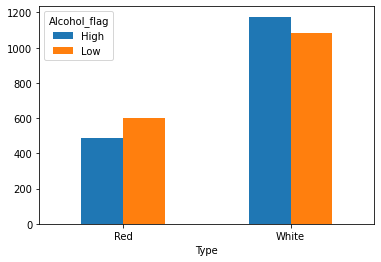

In [26]:
# Create barplot for Type vs. Alcohol Content

barplot1 = crosstab1.plot.bar(rot=0)

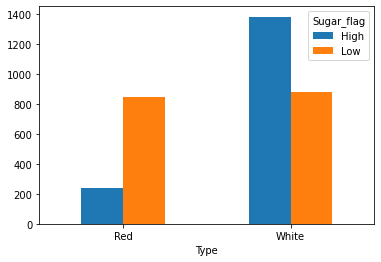

In [27]:
# Create barplot for Type vs. Sugar Content

barplot2 = crosstab2.plot.bar(rot=0)

Use the tables from the previous step to calculate:

a. The prior probability of Type = Red and Type = White.
  
  P(Type = Red) = 1085/3345 = 0.32
  
  P(Type = White) = 2260/3345 = 0.68

b. The probability of high and low alcohol content.
 
  P(Alcohol_flag = High) = (485+1176)/3345 = 0.50

  P(Alcohol_flag = Low) = (600+1084)/3345 = 0.50

c. The probability of high and low sugar content.

  P(Sugar_flag = High) = (237+1382)/3345 = 0.48

  P(Sugar_flag = Low) = (848+878)/3345 = 0.52

d. The conditional probabilities p(Alcohol_flag = High ∣ Type = Red) and p(Alcohol_flag = Low ∣ Type = Red).

P(Alcohol_flag = High | Type = Red) = 485/1085 = 0.45

P(Alcohol_flag = Low | Type = Red) = 600/1085 = 0.55

e. The conditional probabilities p(Sugar_flag = High ∣ Type = Red) and p(Sugar_flag = Low ∣ Type = Red).

P(Sugar_flag = High | Type = Red) = 237/1085 = 0.22

P(Sugar_flag = Low | Type = Red) = 848/1085 = 0.78

Create NB classifiers and record their accuracy on various training/test ratios, e.g., 80-20, 75-25, 70-30, 60-40, 50-50. Be sure to shuffle and stratify the data sets.

In [38]:
# Generating the Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#Create a Gaussian Classifier
NBmodel = GaussianNB()

# Prepare input and output for learning
X = encoded_wineDF.iloc[:,0:2]
y = encoded_wineDF.iloc[:,0:3345]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.35, stratify=y)

# Display the sets
print(X_train)
print(X_test)


      Type  Alcohol_flag
1987     1             1
1197     0             1
411      0             1
829      1             0
1958     1             1
...    ...           ...
2396     1             1
2819     1             0
2354     1             1
1416     0             0
1222     0             1

[2174 rows x 2 columns]
      Type  Alcohol_flag
2956     1             0
2746     1             0
664      1             0
3328     1             0
13       0             1
...    ...           ...
1745     1             1
930      1             0
1015     0             1
954      1             0
2039     1             1

[1171 rows x 2 columns]


Plot the model accuracy measures obtained in Step 8.

In [ ]:
import matplotlib.pyplot as plt

# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy clauses
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuracy on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

# Summary
Approximately 2/3 of the wines were white and the other 1/3 was red. The probability of high alcohol content was equal to the probability of low alcohol content. Overall, the probability of high sugar content and low sugar content were also equal. However, the if the wine was red, it was pretty likely that the sugar content would be low.